# Scratchpad

A simple Python Notebook's scratchpad to test the package functionality

### *) Import libraries and dependencies

In [3]:
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import requests
import json
import os

### 1) Requests API access

In [4]:
# Load API Key and Secret for Authentication

load_dotenv() # take environment variables from .env

key = os.getenv('YOUR_CONSUMER_KEY')
secret = os.getenv('YOUR_CONSUMER_SECRET')

In [5]:
# Load tet-url
url = f'https://app.ticketmaster.com/discovery/v2/events.json?apikey={key}&size=200&page=1&sort=date,asc'

In [6]:
# Request event
r = requests.get(url)

In [7]:
# Checking request status
r.status_code

200

In [8]:
# Storing JSON
event = r.json()

# Checking type
print(type(event))

# Checking JSON keys
print(event['_embedded'].keys())

<class 'dict'>
dict_keys(['events'])


In [9]:
print(event['page'])

{'size': 200, 'totalElements': 168762, 'totalPages': 844, 'number': 1}


In [10]:
# Parsing JSON to csv
event_df = pd.DataFrame(event['_embedded']['events'])

event_df.head()

,name,type,id,test,url,locale,images,sales,dates,classifications,...,_links,_embedded,promoter,promoters,description,place,ticketLimit,info,doorsTimes,products
0,Allegiant Stadium Tours,event,G5vjZ981U8NK-,False,https://www.ticketmaster.com/allegiant-stadium...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-11-05T17:00...,"{'start': {'localDate': '2022-12-15', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5vjZ9...,"{'venues': [{'name': 'Allegiant Stadium', 'typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dolby Theatre Guided Tour,event,vvG10Z94C26sLv,False,https://www.ticketmaster.com/dolby-theatre-gui...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-11-27T20:30...,"{'start': {'localDate': '2022-12-15', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/vvG10Z...,"{'venues': [{'name': 'Dolby Tours', 'type': 'v...","{'id': '494', 'name': 'PROMOTED BY VENUE', 'de...","[{'id': '494', 'name': 'PROMOTED BY VENUE', 'd...",NaN,NaN,NaN,NaN,NaN,NaN
2,THE MYSTERY MAN,event,LvZ18bSBUAYMtj8Zv6lJr,False,https://www.universe.com/events/the-mystery-ma...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2016-01-01T00:00...,{'access': {'startDateTime': '2016-01-01T00:00...,NaN,...,{'self': {'href': '/discovery/v2/events/LvZ18b...,NaN,NaN,NaN,The Mystery Man es la propuesta de un artista...,"{'city': {'name': 'Salamanca'}, 'country': {'n...",NaN,NaN,NaN,NaN
3,Beauty & the Beast,event,G5dbZ91JyoVkU,False,https://www.ticketmaster.co.uk/beauty-the-beas...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-05-11T10:00...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5dbZ9...,"{'venues': [{'name': 'Alhambra Theatre', 'type...","{'id': '2671', 'name': 'ALHAMBRA THEATRE LIMIT...","[{'id': '2671', 'name': 'ALHAMBRA THEATRE LIMI...",NaN,NaN,{'info': 'A max of 8 tickets per person and pe...,NaN,NaN,NaN
4,"Cinderella - Baths Hall, Scunthorpe",event,G5dbZ96CskZDl,False,https://www.ticketmaster.co.uk/cinderella-bath...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-04-01T09:30...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5dbZ9...,"{'venues': [{'name': 'Baths Hall', 'type': 've...","{'id': '5747', 'name': 'NORTH LINCOLNSHIRE COU...","[{'id': '5747', 'name': 'NORTH LINCOLNSHIRE CO...",NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
event_df.columns

Index(['name', 'type', 'id', 'test', 'url', 'locale', 'images', 'sales',
       'dates', 'classifications', 'pleaseNote', 'priceRanges', 'seatmap',
       'accessibility', 'ageRestrictions', 'ticketing', '_links', '_embedded',
       'promoter', 'promoters', 'description', 'place', 'ticketLimit', 'info',
       'doorsTimes', 'products'],
      dtype='object')

In [12]:
event_df

,name,type,id,test,url,locale,images,sales,dates,classifications,...,_links,_embedded,promoter,promoters,description,place,ticketLimit,info,doorsTimes,products
0,Allegiant Stadium Tours,event,G5vjZ981U8NK-,False,https://www.ticketmaster.com/allegiant-stadium...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-11-05T17:00...,"{'start': {'localDate': '2022-12-15', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5vjZ9...,"{'venues': [{'name': 'Allegiant Stadium', 'typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dolby Theatre Guided Tour,event,vvG10Z94C26sLv,False,https://www.ticketmaster.com/dolby-theatre-gui...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-11-27T20:30...,"{'start': {'localDate': '2022-12-15', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/vvG10Z...,"{'venues': [{'name': 'Dolby Tours', 'type': 'v...","{'id': '494', 'name': 'PROMOTED BY VENUE', 'de...","[{'id': '494', 'name': 'PROMOTED BY VENUE', 'd...",NaN,NaN,NaN,NaN,NaN,NaN
2,THE MYSTERY MAN,event,LvZ18bSBUAYMtj8Zv6lJr,False,https://www.universe.com/events/the-mystery-ma...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2016-01-01T00:00...,{'access': {'startDateTime': '2016-01-01T00:00...,NaN,...,{'self': {'href': '/discovery/v2/events/LvZ18b...,NaN,NaN,NaN,The Mystery Man es la propuesta de un artista...,"{'city': {'name': 'Salamanca'}, 'country': {'n...",NaN,NaN,NaN,NaN
3,Beauty & the Beast,event,G5dbZ91JyoVkU,False,https://www.ticketmaster.co.uk/beauty-the-beas...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-05-11T10:00...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5dbZ9...,"{'venues': [{'name': 'Alhambra Theatre', 'type...","{'id': '2671', 'name': 'ALHAMBRA THEATRE LIMIT...","[{'id': '2671', 'name': 'ALHAMBRA THEATRE LIMI...",NaN,NaN,{'info': 'A max of 8 tickets per person and pe...,NaN,NaN,NaN
4,"Cinderella - Baths Hall, Scunthorpe",event,G5dbZ96CskZDl,False,https://www.ticketmaster.co.uk/cinderella-bath...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-04-01T09:30...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5dbZ9...,"{'venues': [{'name': 'Baths Hall', 'type': 've...","{'id': '5747', 'name': 'NORTH LINCOLNSHIRE COU...","[{'id': '5747', 'name': 'NORTH LINCOLNSHIRE CO...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Disney's Frozen (London),event,G5djZ9uNEI7uA,False,https://theatre.ticketmaster.co.uk/book/1DZ7A-...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-06-24T15:34...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5djZ9...,{'venues': [{'name': 'Theatre Royal Drury Lane...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Matilda the Musical,event,G5djZpUTDePMA,False,https://theatre.ticketmaster.co.uk/book/3WT4-m...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2021-11-15T17:55...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5djZp...,"{'venues': [{'name': 'Cambridge Theatre', 'typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Christmas At the Castle,event,G5e0Z9pDHp4YG,False,https://www.ticketweb.ca/event/christmas-at-th...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-11-14T17:00...,"{'start': {'localDate': '2022-12-15

In [13]:
event_df

,name,type,id,test,url,locale,images,sales,dates,classifications,...,_links,_embedded,promoter,promoters,description,place,ticketLimit,info,doorsTimes,products
0,Allegiant Stadium Tours,event,G5vjZ981U8NK-,False,https://www.ticketmaster.com/allegiant-stadium...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-11-05T17:00...,"{'start': {'localDate': '2022-12-15', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5vjZ9...,"{'venues': [{'name': 'Allegiant Stadium', 'typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dolby Theatre Guided Tour,event,vvG10Z94C26sLv,False,https://www.ticketmaster.com/dolby-theatre-gui...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-11-27T20:30...,"{'start': {'localDate': '2022-12-15', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/vvG10Z...,"{'venues': [{'name': 'Dolby Tours', 'type': 'v...","{'id': '494', 'name': 'PROMOTED BY VENUE', 'de...","[{'id': '494', 'name': 'PROMOTED BY VENUE', 'd...",NaN,NaN,NaN,NaN,NaN,NaN
2,THE MYSTERY MAN,event,LvZ18bSBUAYMtj8Zv6lJr,False,https://www.universe.com/events/the-mystery-ma...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2016-01-01T00:00...,{'access': {'startDateTime': '2016-01-01T00:00...,NaN,...,{'self': {'href': '/discovery/v2/events/LvZ18b...,NaN,NaN,NaN,The Mystery Man es la propuesta de un artista...,"{'city': {'name': 'Salamanca'}, 'country': {'n...",NaN,NaN,NaN,NaN
3,Beauty & the Beast,event,G5dbZ91JyoVkU,False,https://www.ticketmaster.co.uk/beauty-the-beas...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-05-11T10:00...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5dbZ9...,"{'venues': [{'name': 'Alhambra Theatre', 'type...","{'id': '2671', 'name': 'ALHAMBRA THEATRE LIMIT...","[{'id': '2671', 'name': 'ALHAMBRA THEATRE LIMI...",NaN,NaN,{'info': 'A max of 8 tickets per person and pe...,NaN,NaN,NaN
4,"Cinderella - Baths Hall, Scunthorpe",event,G5dbZ96CskZDl,False,https://www.ticketmaster.co.uk/cinderella-bath...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-04-01T09:30...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5dbZ9...,"{'venues': [{'name': 'Baths Hall', 'type': 've...","{'id': '5747', 'name': 'NORTH LINCOLNSHIRE COU...","[{'id': '5747', 'name': 'NORTH LINCOLNSHIRE CO...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Disney's Frozen (London),event,G5djZ9uNEI7uA,False,https://theatre.ticketmaster.co.uk/book/1DZ7A-...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-06-24T15:34...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5djZ9...,{'venues': [{'name': 'Theatre Royal Drury Lane...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Matilda the Musical,event,G5djZpUTDePMA,False,https://theatre.ticketmaster.co.uk/book/3WT4-m...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2021-11-15T17:55...,"{'start': {'localDate': '2022-12-15', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5djZp...,"{'venues': [{'name': 'Cambridge Theatre', 'typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Christmas At the Castle,event,G5e0Z9pDHp4YG,False,https://www.ticketweb.ca/event/christmas-at-th...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-11-14T17:00...,"{'start': {'localDate': '2022-12-15

In [14]:
# Unpacking price type, currency, price_min, price_max, city, lon-lat, genre, and segment
event_df['price'] = event_df.priceRanges.dropna().apply(pd.Series)[0]
event_df[['price_type','currency','price_min','price_max']] = event_df.price.dropna().apply(pd.Series)
event_df['city'] = event_df.place.dropna().apply(pd.Series).city.apply(pd.Series)
event_df[['lon','lat']] = event_df.place.dropna().apply(pd.Series).location.apply(pd.Series)
event_df['genre'] = event_df.classifications.apply(pd.Series)[0].apply(pd.Series).genre.apply(pd.Series)['name']
event_df['segment'] = event_df.classifications.apply(pd.Series)[0].apply(pd.Series).segment.apply(pd.Series)['name']

# Getting startdate and enddate of sales
event_df['startdate'] = None
event_df['enddate'] = None
for x in range(len(event_df)):
    event_df['startdate'][x] = event_df.sales[x].get('public').get('startDateTime')
    event_df['enddate'][x] = event_df.sales[x].get('public').get('endDateTime')

/var/folders/lm/4m76p6md5yn5mmc11llt8hvw0000gn/T/ipykernel_20906/2585951540.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['startdate'][x] = event_df.sales[x].get('public').get('startDateTime')
/var/folders/lm/4m76p6md5yn5mmc11llt8hvw0000gn/T/ipykernel_20906/2585951540.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['enddate'][x] = event_df.sales[x].get('public').get('endDateTime')


In [15]:
# Take description into wordcloud
event_df.description.dropna().str.len().max()

4219

<AxesSubplot: >

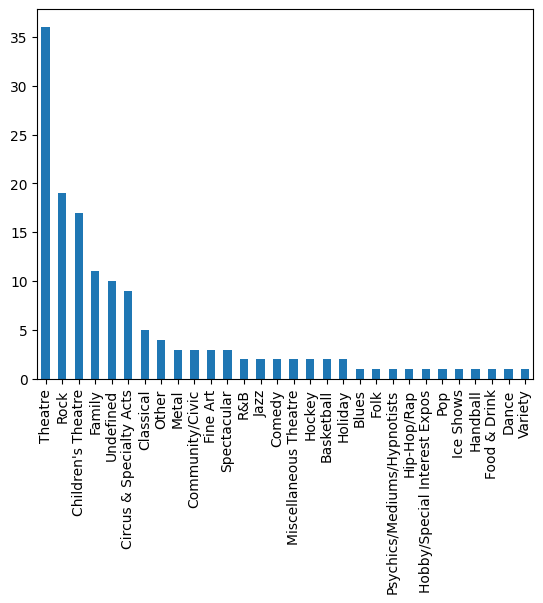

In [20]:
event_df.genre.value_counts().plot(kind='bar')

In [32]:
event_df.price_min.describe()

count     55.000000
mean      69.361273
std      133.999680
min        0.000000
25%       17.250000
50%       28.900000
75%       50.235000
max      853.000000
Name: price_min, dtype: float64

In [33]:
event_df.price_max.describe()

count      55.000000
mean      124.159636
std       225.994079
min        13.500000
25%        25.250000
50%        40.240000
75%       134.185000
max      1284.000000
Name: price_max, dtype: float64

### TO DO:

1. Bikin heatmap frekuensi
2. Bikin heatmap demand/supply ratio
3. Bikin trendline supply-demand frequency
4. Bikin trendline supply-demand ratio
5. Bikin wordcloud (description, title)
6. Average price trendline by genre
7. Translate into function
8. Python build package 